# Simple Convolutional Neural Network for Audio Recogntion <br>

Author: Jamie McQuire

* This notebook is for the 6-word vocabulary dataset.
* The convolutional neural network used in this report is inspired using the Keras CIFAR-10 image classification tutorial.
* [CIFAR-10](https://keras.io/examples/cifar10_cnn/)
* The network will be trained using the image data from the data pre-processing notebook.
* Upload this notebook to [Google Colab](https://colab.research.google.com/) for faster computing with a GPU.
* If you wish to repeat this analysis please upload the data from the pre-processing notebook and upload to a google drive (directories will have to be set appropriately).


In [0]:
#import packages
import numpy as np
import os
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sn

import tensorflow as tf
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense, Conv2D, Flatten, Dropout, MaxPooling2D, Activation, Input
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import keras
from collections import Counter
from sklearn.metrics import confusion_matrix

* Mount to your google drive where you should have the data stored.
* Alternatively you can store the data in the Colab working environment.

In [0]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


* Load in the training, validation, and testing data from the pre-processing notebook.
* Set your directories for reproducible analysis.

In [0]:
#load in the training data and labels
X_train = np.load("/content/drive/My Drive/Tensor_Flow_Speech_Recognition_Challenge/data/X_train.npy")
Y_train = np.load("/content/drive/My Drive/Tensor_Flow_Speech_Recognition_Challenge/data/Y_train.npy")

#load in the validation data and labels
X_val = np.load("/content/drive/My Drive/Tensor_Flow_Speech_Recognition_Challenge/data/X_val.npy")
Y_val = np.load("/content/drive/My Drive/Tensor_Flow_Speech_Recognition_Challenge/data/Y_val.npy")

X_test = np.load("/content/drive/My Drive/Tensor_Flow_Speech_Recognition_Challenge/data/X_test.npy")
Y_test = np.load("/content/drive/My Drive/Tensor_Flow_Speech_Recognition_Challenge/data/Y_test.npy")

* Setting the default settings.
* Test to see that the image_size = (161, 99, 1).

In [0]:
batch_size = 128
epochs = 10
image_size = X_train.shape[1:]
output_size = 6

print(image_size)

(161, 99, 1)


* Scale the pixels for the deep learning algorithms.

In [0]:
X_train_scaled = X_train * (1 / 255)
X_val_scaled = X_val * (1  / 255)
X_test_scaled = X_test * (1 / 255)

* Convert the labels to one-hot-encoded vectors.

In [0]:
Y_train = keras.utils.to_categorical(Y_train,output_size)
Y_val = keras.utils.to_categorical(Y_val,output_size)
Y_test = keras.utils.to_categorical(Y_test,output_size)

* Function to define the architecture of the simple CNN.

In [0]:
def SimpleConvolutionalModel(F, input_shape=(161,99,1),output_size=output_size):

  f1, f2 = F

  X_input = Input(input_shape)

  X = Conv2D(f1,(3,3),padding="same")(X_input)
  X = Activation("relu")(X)
  X = Conv2D(f1,(3,3),padding="same")(X)
  X = MaxPooling2D((2,2))(X)
  X = Dropout(0.25)(X)

  X = Conv2D(f2,(3,3),padding="same")(X)
  X = Activation("relu")(X)
  X = Conv2D(f2,(3,3),padding="same")(X)
  X = MaxPooling2D((2,2))(X)
  X = Dropout(0.25)(X)

  X = Flatten()(X)
  X = Dense(256,activation="relu")(X)
  X = Dropout(0.25)(X)
  X = Dense(output_size,activation="softmax")(X)

  model = Model(inputs=X_input,outputs=X,name="ConvNet")

  return model

* Create the model and compile.
* Summary should provide information about the layers.

In [0]:
model = SimpleConvolutionalModel(F=[256,128])
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])
model.summary()

Instructions for updating:
If using Keras pass *_constraint arguments to layers.
Model: "ConvNet"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 161, 99, 1)]      0         
_________________________________________________________________
conv2d (Conv2D)              (None, 161, 99, 256)      2560      
_________________________________________________________________
activation (Activation)      (None, 161, 99, 256)      0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 161, 99, 256)      590080    
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 80, 49, 256)       0         
_________________________________________________________________
dropout (Dropout)            (None, 80, 49, 256)       0         
____________________________________________

* Train the model.
* Ensure the GPU is enabled in the hardware settings otherwise this could take some time.

In [0]:
history = model.fit(X_train_scaled,Y_train,epochs=20,validation_data=(X_val_scaled,Y_val),
                    batch_size=batch_size,shuffle=True)

Train on 10228 samples, validate on 2557 samples
Epoch 1/20
10228/10228 [==============================] - 83s 8ms/sample - loss: 1.2457 - acc: 0.5066 - val_loss: 0.7838 - val_acc: 0.7106
Epoch 2/20
10228/10228 [==============================] - 68s 7ms/sample - loss: 0.7043 - acc: 0.7440 - val_loss: 0.5050 - val_acc: 0.8342
Epoch 3/20
10228/10228 [==============================] - 68s 7ms/sample - loss: 0.4687 - acc: 0.8341 - val_loss: 0.3603 - val_acc: 0.8721
Epoch 4/20
10228/10228 [==============================] - 68s 7ms/sample - loss: 0.3144 - acc: 0.8916 - val_loss: 0.3420 - val_acc: 0.8831
Epoch 5/20
10228/10228 [==============================] - 68s 7ms/sample - loss: 0.2422 - acc: 0.9163 - val_loss: 0.2970 - val_acc: 0.9007
Epoch 6/20
10228/10228 [==============================] - 68s 7ms/sample - loss: 0.1882 - acc: 0.9340 - val_loss: 0.2894 - val_acc: 0.9077
Epoch 7/20
10228/10228 [==============================] - 68s 7ms/sample - loss: 0.1399 - acc: 0.9513 - val_loss: 0.3

* Evaluate the accuracy on the testing set.

In [0]:
scores = model.evaluate(X_test_scaled,Y_test,verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Test loss: 0.3668956064329437
Test accuracy: 0.9190711


* Code to plot the accuracy of the training and validation sets during model training.
* Will save to a PDF figure in the working environment.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'bottom right'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


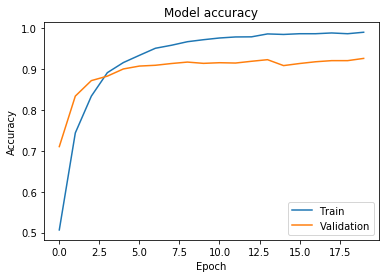

In [0]:
plt.plot(history.history['acc'])
plt.plot(history.history['val_acc'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='bottom right')
fig = plt.gcf()
fig.savefig("ConvNet_6_Vocab_acc.pdf",bbox_inches="tight")
plt.show()

* Code to plot the loss of the training and validation sets during model training.
* Will save to a PDF figure in the working environment.

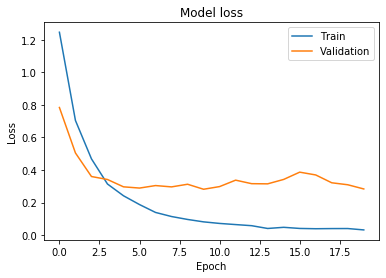

In [0]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
fig = plt.gcf()
fig.savefig("ConvNet_6_Vocab_loss.pdf",bbox_inches="tight")
plt.show()

* Rebuilds the model and trains for a shorter time.
* This was because of the conclusion stated in the report.

In [0]:
model = SimpleConvolutionalModel(F=[256,128])
model.compile(loss="categorical_crossentropy",optimizer="adam",metrics=["acc"])

history = model.fit(X_train_scaled,Y_train,epochs=5,validation_data=(X_val_scaled,Y_val),
                    batch_size=batch_size,shuffle=True)

scores = model.evaluate(X_test_scaled,Y_test,verbose=0)
print('Test loss:', scores[0])
print('Test accuracy:', scores[1])

Train on 10228 samples, validate on 2557 samples
Epoch 1/5
10228/10228 [==============================] - 68s 7ms/sample - loss: 1.1715 - acc: 0.5436 - val_loss: 0.7213 - val_acc: 0.7395
Epoch 2/5
10228/10228 [==============================] - 68s 7ms/sample - loss: 0.5848 - acc: 0.7943 - val_loss: 0.4504 - val_acc: 0.8408
Epoch 3/5
10228/10228 [==============================] - 68s 7ms/sample - loss: 0.3724 - acc: 0.8691 - val_loss: 0.3478 - val_acc: 0.8807
Epoch 4/5
10228/10228 [==============================] - 68s 7ms/sample - loss: 0.2413 - acc: 0.9134 - val_loss: 0.2871 - val_acc: 0.9026
Epoch 5/5
10228/10228 [==============================] - 68s 7ms/sample - loss: 0.1649 - acc: 0.9424 - val_loss: 0.2860 - val_acc: 0.9116
Test loss: 0.3234837856051957
Test accuracy: 0.9057002


* Plot of a confusion matrix to view how the model classifies each voice command.
* Will save the output to a PDF in the working environment.

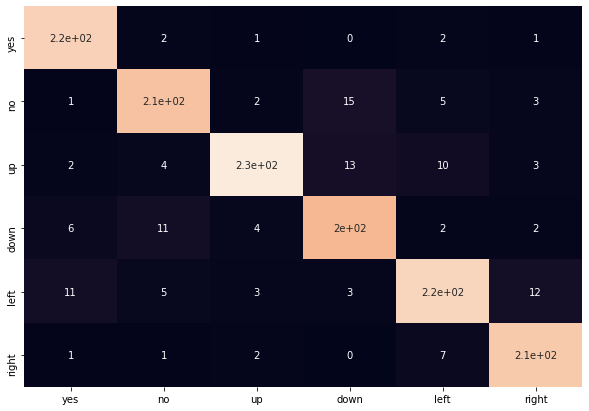

In [0]:
Y_pred = model.predict(X_test_scaled)
y_pred = np.argmax(Y_pred, axis=1)
y_true = np.argmax(Y_test,axis=1)
conf_mat = confusion_matrix(y_true,y_pred)
labs = ["yes","no","up","down","left","right"]

df_conf_mat = pd.DataFrame(conf_mat, index = [i for i in labs],
                  columns = [i for i in labs])
plt.figure(figsize = (10,7))
sn.heatmap(df_conf_mat, annot=True,cbar=False)
fig = plt.gcf()
fig.savefig("ConvNet_6_Vocab_cmap.pdf",bbox_inches="tight")